### Collecting and Visualizing COVID-19 Data

Here we will pull together the CSSE data on Coronavirus in different countries and make prediction for the spreading the desease in different countries. I used the very comprehensive John Hopkins CSSE resource, the data about number of cases and deaths for each country were downloaded from this web-page https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases. Here We need to do some filtering and cleaning.

In [1]:
import os
import numpy as np
import pandas as pd

os.chdir('/home/nikolay/Documents/Medium/COVID19/')

cases = pd.read_csv('time_series_covid19_confirmed_global.csv')
cases = cases[cases['Province/State'].isna()==True]
cases.index = list(cases['Country/Region'])
cases = cases.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
cases = cases.drop(list(cases.columns[0:30]), axis = 1)
cases.head()

,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Afghanistan,0,0,0,1,1,1,1,1,1,1,...,423,444,484,521,555,607,665,714,784,840
Albania,0,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
Algeria,0,0,0,0,1,1,1,1,1,1,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
Andorra,0,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
Angola,0,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19


In [2]:
cases.loc['Sweden']

2/21/20        1
2/22/20        1
2/23/20        1
2/24/20        1
2/25/20        1
2/26/20        2
2/27/20        7
2/28/20        7
2/29/20       12
3/1/20        14
3/2/20        15
3/3/20        21
3/4/20        35
3/5/20        94
3/6/20       101
3/7/20       161
3/8/20       203
3/9/20       248
3/10/20      355
3/11/20      500
3/12/20      599
3/13/20      814
3/14/20      961
3/15/20     1022
3/16/20     1103
3/17/20     1190
3/18/20     1279
3/19/20     1439
3/20/20     1639
3/21/20     1763
3/22/20     1934
3/23/20     2046
3/24/20     2286
3/25/20     2526
3/26/20     2840
3/27/20     3069
3/28/20     3447
3/29/20     3700
3/30/20     4028
3/31/20     4435
4/1/20      4947
4/2/20      5568
4/3/20      6131
4/4/20      6443
4/5/20      6830
4/6/20      7206
4/7/20      7693
4/8/20      8419
4/9/20      9141
4/10/20     9685
4/11/20    10151
4/12/20    10483
4/13/20    10948
4/14/20    11445
4/15/20    11927
4/16/20    12540
Name: Sweden, dtype: int64

In [3]:
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
deaths = deaths[deaths['Province/State'].isna()==True]
deaths.index = list(deaths['Country/Region'])
deaths = deaths.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
deaths = deaths.drop(list(deaths.columns[0:30]), axis = 1)
deaths.head()

,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14,14,15,15,18,18,21,23,25,30
Albania,0,0,0,0,0,0,0,0,0,0,...,22,22,23,23,23,23,23,24,25,26
Algeria,0,0,0,0,0,0,0,0,0,0,...,193,205,235,256,275,293,313,326,336,348
Andorra,0,0,0,0,0,0,0,0,0,0,...,22,23,25,26,26,29,29,31,33,33
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
deaths.loc['Sweden']

2/21/20       0
2/22/20       0
2/23/20       0
2/24/20       0
2/25/20       0
2/26/20       0
2/27/20       0
2/28/20       0
2/29/20       0
3/1/20        0
3/2/20        0
3/3/20        0
3/4/20        0
3/5/20        0
3/6/20        0
3/7/20        0
3/8/20        0
3/9/20        0
3/10/20       0
3/11/20       1
3/12/20       1
3/13/20       1
3/14/20       2
3/15/20       3
3/16/20       6
3/17/20       7
3/18/20      10
3/19/20      11
3/20/20      16
3/21/20      20
3/22/20      21
3/23/20      25
3/24/20      36
3/25/20      62
3/26/20      77
3/27/20     105
3/28/20     105
3/29/20     110
3/30/20     146
3/31/20     180
4/1/20      239
4/2/20      308
4/3/20      358
4/4/20      373
4/5/20      401
4/6/20      477
4/7/20      591
4/8/20      687
4/9/20      793
4/10/20     870
4/11/20     887
4/12/20     899
4/13/20     919
4/14/20    1033
4/15/20    1203
4/16/20    1333
Name: Sweden, dtype: int64

In [5]:
deaths.loc['Sweden']

2/21/20       0
2/22/20       0
2/23/20       0
2/24/20       0
2/25/20       0
2/26/20       0
2/27/20       0
2/28/20       0
2/29/20       0
3/1/20        0
3/2/20        0
3/3/20        0
3/4/20        0
3/5/20        0
3/6/20        0
3/7/20        0
3/8/20        0
3/9/20        0
3/10/20       0
3/11/20       1
3/12/20       1
3/13/20       1
3/14/20       2
3/15/20       3
3/16/20       6
3/17/20       7
3/18/20      10
3/19/20      11
3/20/20      16
3/21/20      20
3/22/20      21
3/23/20      25
3/24/20      36
3/25/20      62
3/26/20      77
3/27/20     105
3/28/20     105
3/29/20     110
3/30/20     146
3/31/20     180
4/1/20      239
4/2/20      308
4/3/20      358
4/4/20      373
4/5/20      401
4/6/20      477
4/7/20      591
4/8/20      687
4/9/20      793
4/10/20     870
4/11/20     887
4/12/20     899
4/13/20     919
4/14/20    1033
4/15/20    1203
4/16/20    1333
Name: Sweden, dtype: int64

In [6]:
deaths_sweden_df = pd.DataFrame({'Date': deaths.loc['Sweden'].diff().index, 
                                 'DeathPerDay': list(deaths.loc['Sweden'].diff())})
deaths_sweden_df = deaths_sweden_df[deaths_sweden_df['DeathPerDay']>=2]
deaths_sweden_df

,Date,DeathPerDay
24,3/16/20,3.0
26,3/18/20,3.0
28,3/20/20,5.0
29,3/21/20,4.0
31,3/23/20,4.0
32,3/24/20,11.0
33,3/25/20,26.0
34,3/26/20,15.0
35,3/27/20,28.0
37,3/29/20,5.0


In [7]:
deaths_sweden_df.sum()

Date           3/16/203/18/203/20/203/21/203/23/203/24/203/25...
DeathPerDay                                                 1327
dtype: object

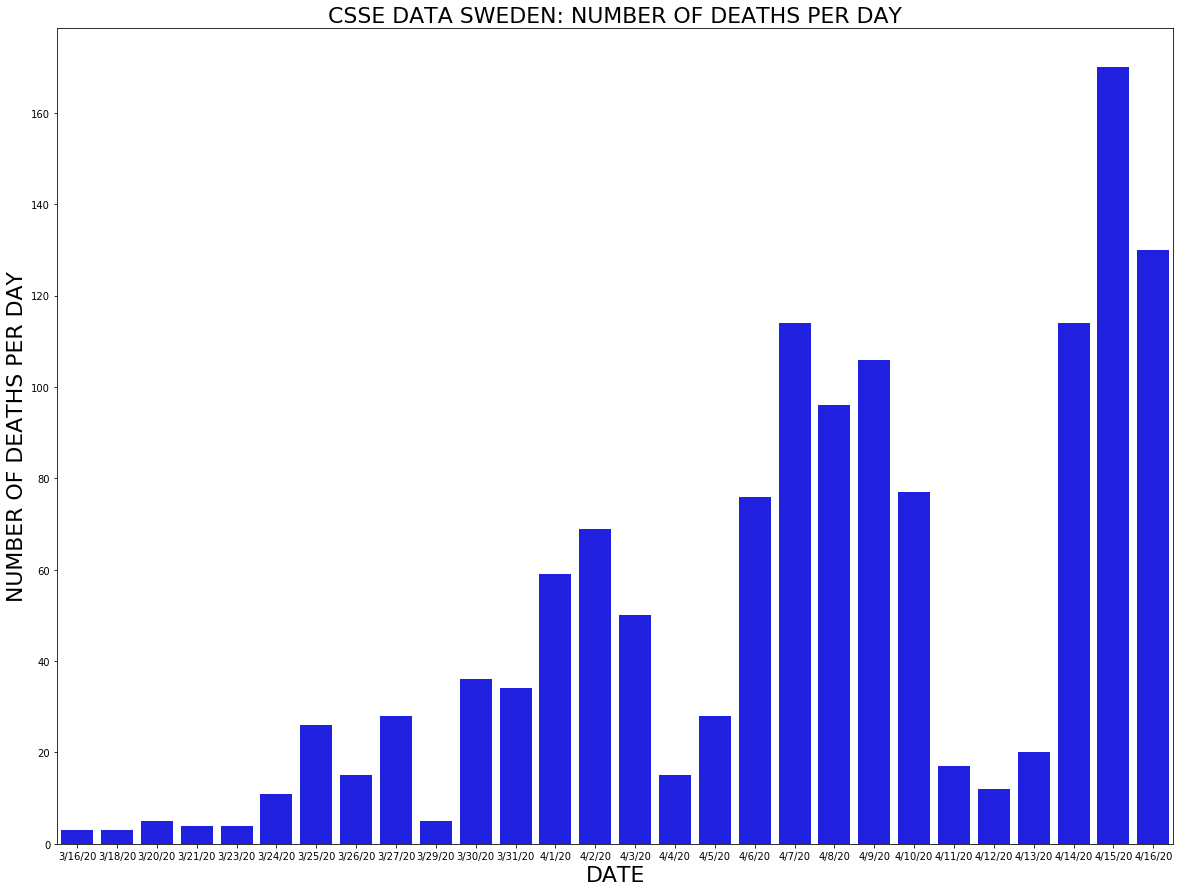

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
sns.barplot(x='Date', y='DeathPerDay', data = deaths_sweden_df, color = 'blue')
plt.ylabel('NUMBER OF DEATHS PER DAY', fontsize = 22)
plt.xlabel('DATE', fontsize = 22)
plt.title('CSSE DATA SWEDEN: NUMBER OF DEATHS PER DAY', fontsize = 22)
plt.show()

In [10]:
fhm_deaths = pd.read_csv('FHM.csv')
fhm_deaths = fhm_deaths[fhm_deaths['Antal_avlidna']>=2]
fhm_deaths

,Datum_avliden,Antal_avlidna
4,3/15/2020,2
5,3/16/2020,2
7,3/18/2020,6
8,3/19/2020,7
9,3/20/2020,10
10,3/21/2020,7
11,3/22/2020,12
12,3/23/2020,11
13,3/24/2020,20
14,3/25/2020,25


In [11]:
fhm_deaths.sum()

Datum_avliden    3/15/20203/16/20203/18/20203/19/20203/20/20203...
Antal_avlidna                                                 1311
dtype: object

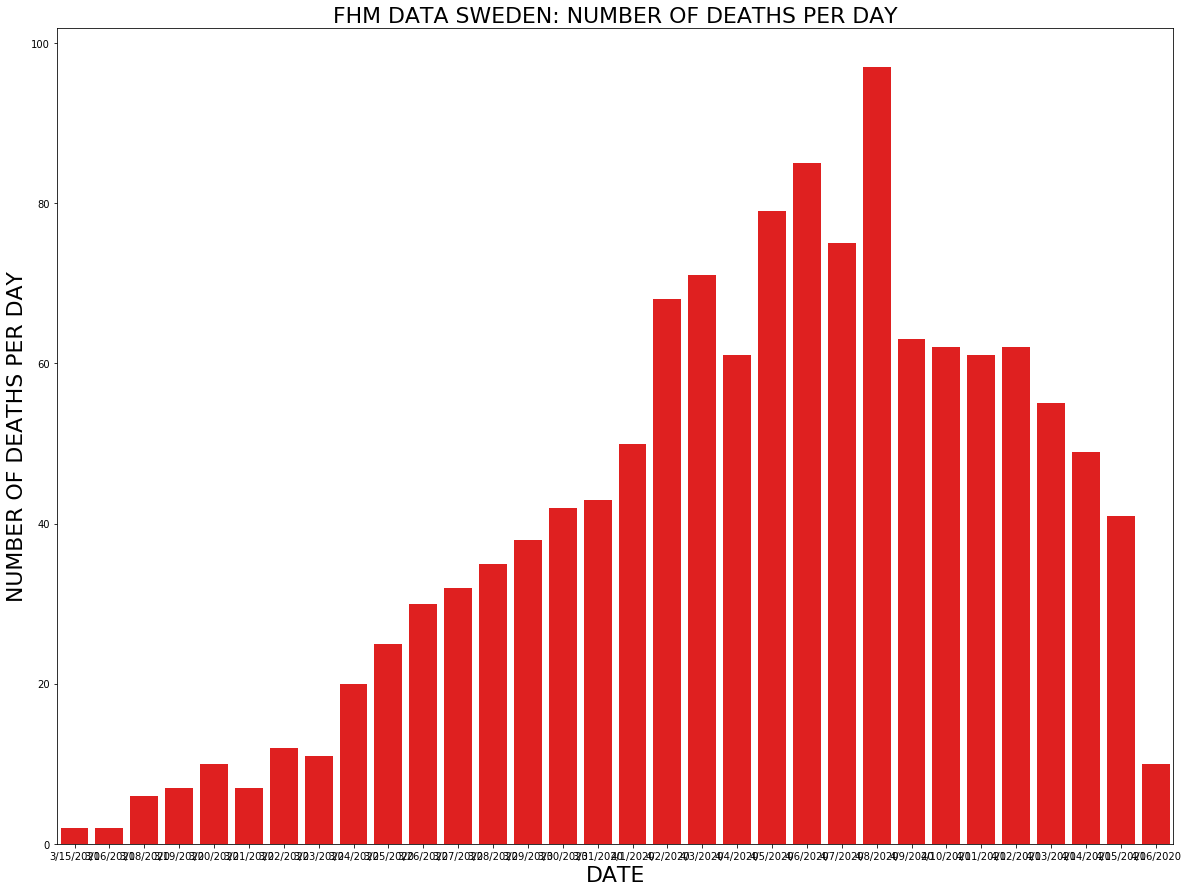

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
sns.barplot(x='Datum_avliden', y='Antal_avlidna', data = fhm_deaths, color = 'red')
plt.ylabel('NUMBER OF DEATHS PER DAY', fontsize = 22)
plt.xlabel('DATE', fontsize = 22)
plt.title('FHM DATA SWEDEN: NUMBER OF DEATHS PER DAY', fontsize = 22)
plt.show()

Let us have a look at the number of deaths after 23d of March:

In [13]:
deaths_weekday_sweden = deaths.loc['Sweden'].diff()[['3/24/20', '3/25/20', '3/26/20', '3/27/20', 
                                                     '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', 
                                                     '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', 
                                                     '4/14/20', '4/15/20', '4/16/20']]
deaths_weekday_sweden

3/24/20     11.0
3/25/20     26.0
3/26/20     15.0
3/27/20     28.0
3/30/20     36.0
3/31/20     34.0
4/1/20      59.0
4/2/20      69.0
4/3/20      50.0
4/6/20      76.0
4/7/20     114.0
4/8/20      96.0
4/9/20     106.0
4/10/20     77.0
4/14/20    114.0
4/15/20    170.0
4/16/20    130.0
Name: Sweden, dtype: float64

In [14]:
deaths_weekend_sweden = deaths.loc['Sweden'].diff()[['3/28/20', '3/29/20', 
                                                     '4/4/20', '4/5/20', '4/11/20', 
                                                     '4/12/20', '4/13/20']]
deaths_weekend_sweden

3/28/20     0.0
3/29/20     5.0
4/4/20     15.0
4/5/20     28.0
4/11/20    17.0
4/12/20    12.0
4/13/20    20.0
Name: Sweden, dtype: float64

Looking at the number of deaths in Sweden on the weekends and weekdays demonstrates an anomalous "efficiency of the health care sytem" on the weekends, looks like people in Sweden with COVID19 die significantly more often on the weekdays compared to the weekends.

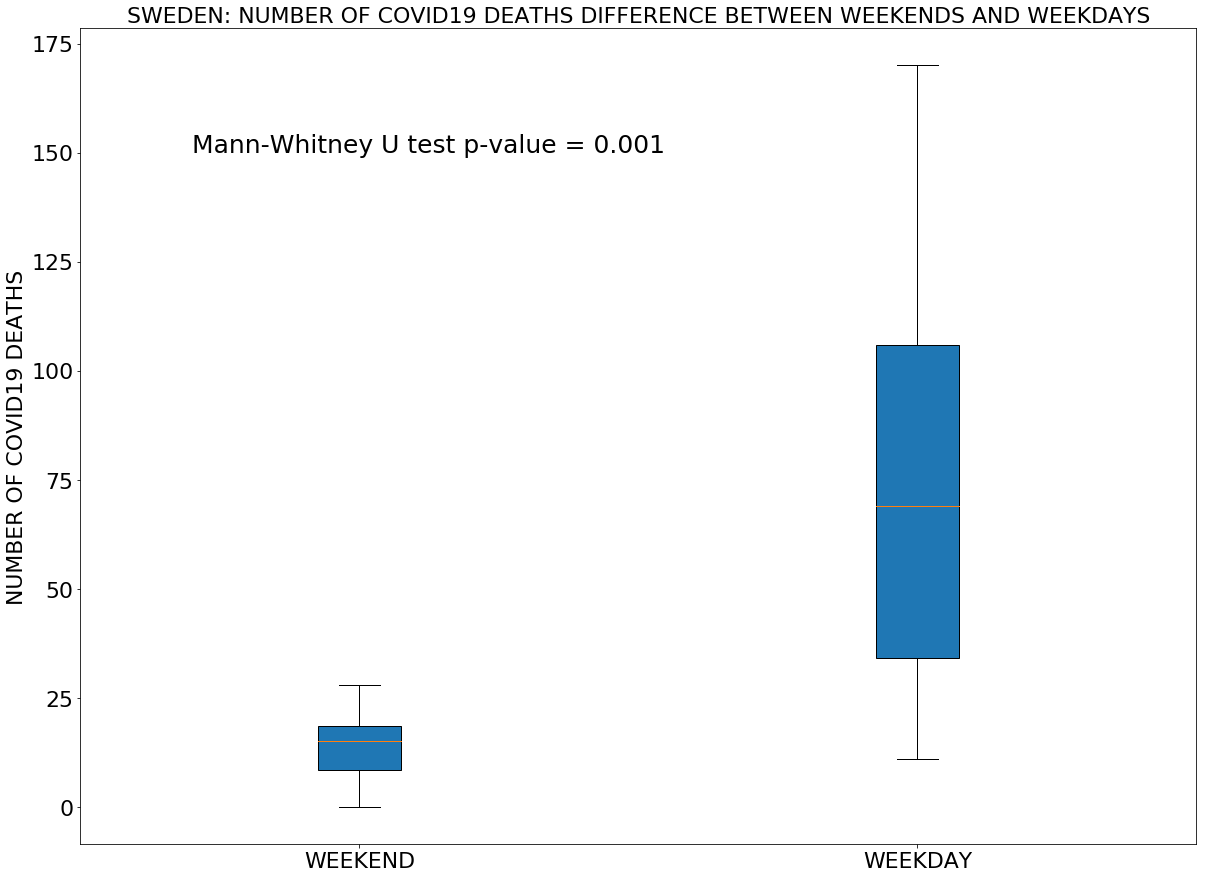

In [15]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
matplotlib.rcParams.update({'font.size': 22})
plt.boxplot([list(deaths_weekend_sweden), list(deaths_weekday_sweden)], patch_artist = True, 
           labels = ['WEEKEND', 'WEEKDAY'])
plt.ylabel('NUMBER OF COVID19 DEATHS', fontsize = 22)
plt.title('SWEDEN: NUMBER OF COVID19 DEATHS DIFFERENCE BETWEEN WEEKENDS AND WEEKDAYS', fontsize = 22)
plt.text(0.7, 150, s= 'Mann-Whitney U test p-value = 0.001', fontsize = 25)
plt.show()

In [16]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(list(deaths_weekend_sweden), list(deaths_weekday_sweden))
print('Statistics = %.3f, p = %.3f' % (stat, p))

Statistics = 10.000, p = 0.001


The decrase of the deaths on the weekends is anomalous and can not be seen from the deaths stats in Sweden from the previous years, in fact it was the opposite situation (people died more often on the weekends than on the weekdays) in 2016:

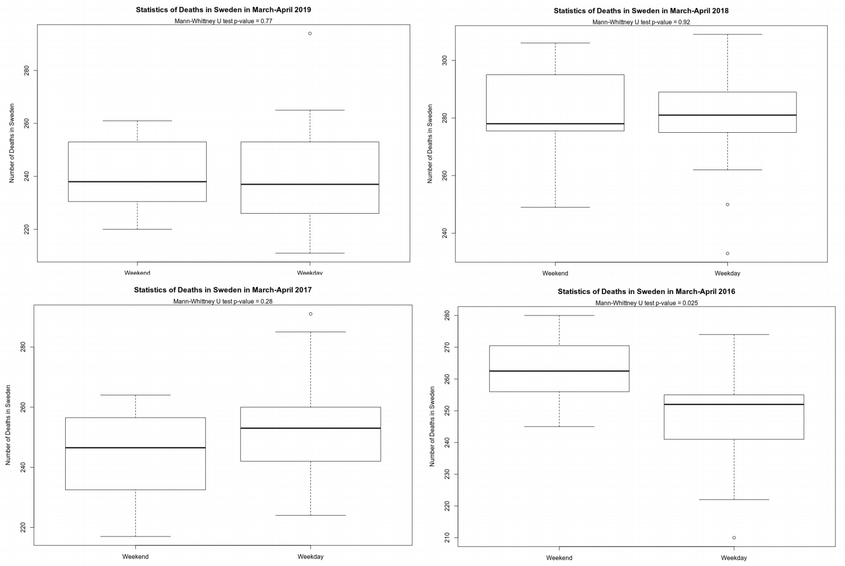

In [17]:
from IPython.display import Image
Image('/home/nikolay/Documents/Medium/COVID19/deaths_sweden_march_april_2016_2019.png', width=1000)

In [18]:
deaths2cases = (deaths + 1) / (cases + 1)
deaths2cases = deaths2cases.drop(list(deaths2cases.columns[0:25]), axis = 1)
deaths2cases.head()

,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Afghanistan,0.043478,0.043478,0.043478,0.040000,0.040000,0.048780,0.048780,0.026667,0.035294,0.052632,...,0.035377,0.033708,0.032990,0.030651,0.034173,0.031250,0.033033,0.033566,0.033121,0.036861
Albania,0.035714,0.050000,0.046154,0.042254,0.038961,0.033333,0.047619,0.048387,0.040816,0.040000,...,0.059896,0.057357,0.058537,0.057554,0.055300,0.053691,0.051282,0.052521,0.052525,0.052023
Algeria,0.081967,0.106667,0.113636,0.131868,0.114286,0.089109,0.077922,0.075472,0.072607,0.070652,...,0.132063,0.130960,0.141572,0.145857,0.151150,0.153525,0.158266,0.157895,0.155946,0.153812
Andorra,0.025000,0.025000,0.018519,0.013158,0.011236,0.017544,0.014925,0.012121,0.010582,0.017778,...,0.042125,0.042478,0.044521,0.044850,0.044850,0.046948,0.046368,0.048485,0.050445,0.050445
Angola,1.000000,1.000000,1.000000,0.500000,0.333333,0.333333,0.250000,0.250000,0.250000,0.200000,...,0.166667,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000


In [19]:
eur_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 
                 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
                 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 
                 'Spain', 'Sweden', 'United Kingdom', 'US', 'Russia', 'Brazil', 'Turkey', 'India', 'Mexico', 
                 'Serbia', 'Switzerland']
deaths2cases_europe = deaths2cases.loc[eur_countries]
deaths2cases_europe

,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Austria,0.003001,0.003036,0.003476,0.002930,0.003197,0.004745,0.004916,0.005488,0.005547,0.007236,...,0.019304,0.021170,0.022348,0.023606,0.024480,0.025169,0.026278,0.027061,0.027481,0.028390
Belgium,0.008842,0.010087,0.012249,0.016829,0.024148,0.022340,0.023771,0.028806,0.036249,0.035439,...,0.091732,0.095753,0.101025,0.113244,0.119455,0.121458,0.127623,0.133612,0.132275,0.139558
Bulgaria,0.044118,0.032258,0.042105,0.031250,0.024390,0.021277,0.019802,0.018265,0.016461,0.015094,...,0.041522,0.042088,0.040388,0.040881,0.043807,0.044379,0.048105,0.050420,0.049465,0.048689
Croatia,0.015152,0.012195,0.018868,0.015504,0.009662,0.007843,0.006329,0.005222,0.004515,0.008065,...,0.014809,0.014881,0.014915,0.014706,0.014332,0.014991,0.015748,0.018768,0.019518,0.020089
Cyprus,0.021277,0.020000,0.014706,0.014706,0.011765,0.020833,0.017094,0.032000,0.030075,0.027211,...,0.020202,0.018975,0.019469,0.018456,0.017828,0.018927,0.019608,0.018678,0.018156,0.017663
Czechia,0.002519,0.002151,0.001439,0.001199,0.001004,0.001784,0.001617,0.002867,0.004230,0.005192,...,0.017736,0.018822,0.020287,0.020931,0.022291,0.023198,0.023762,0.026505,0.026862,0.026422
Denmark,0.005112,0.004726,0.006076,0.007962,0.010550,0.010029,0.017229,0.020729,0.020290,0.022364,...,0.040221,0.040533,0.042229,0.042612,0.043522,0.044372,0.045260,0.046069,0.046393,0.046802
Estonia,0.004425,0.003861,0.003731,0.003521,0.003257,0.003058,0.002833,0.002703,0.004938,0.003711,...,0.019130,0.021079,0.020695,0.019857,0.019157,0.019847,0.021755,0.023290,0.025696,0.025784
Finland,0.003106,0.002967,0.002494,0.002217,0.003817,0.003190,0.002853,0.002522,0.004540,0.006257,...,0.015158,0.016479,0.016500,0.017690,0.017206,0.019160,0.019576,0.020557,0.022545,0.022552
France,0.019469,0.016475,0.022443,0.035757,0.039417,0.042137,0.043360,0.049361,0.052786,0.058204,...,0.132138,0.132482,0.141437,0.145550,0.147487,0.119320,0.120419,0.120764,0.128627,0.122779


In [20]:
deaths_europe = deaths.iloc[:,-1].loc[eur_countries].sort_values(ascending=False)
deaths_europe

US                32916
Italy             22170
Spain             19315
France            17920
United Kingdom    13729
Belgium            4857
Germany            4052
Netherlands        3315
Brazil             1924
Turkey             1643
Sweden             1333
Switzerland        1281
Portugal            629
Ireland             486
Mexico              449
India               448
Austria             410
Romania             392
Denmark             321
Poland              314
Russia              232
Czechia             169
Hungary             142
Greece              105
Serbia              103
Finland              75
Luxembourg           69
Slovenia             61
Bulgaria             38
Estonia              36
Croatia              35
Lithuania            32
Cyprus               12
Slovakia              8
Latvia                5
Malta                 3
Name: 4/16/20, dtype: int64

In [21]:
deaths2cases.iloc[:,-1]

Afghanistan              0.036861
Albania                  0.052023
Algeria                  0.153812
Andorra                  0.050445
Angola                   0.150000
                           ...   
Malawi                   0.176471
South Sudan              0.200000
Western Sahara           0.142857
Sao Tome and Principe    0.200000
Yemen                    0.500000
Name: 4/16/20, Length: 182, dtype: float64

In [22]:
deaths.iloc[:,-1]

Afghanistan               30
Albania                   26
Algeria                  348
Andorra                   33
Angola                     2
                        ... 
Malawi                     2
South Sudan                0
Western Sahara             0
Sao Tome and Principe      0
Yemen                      0
Name: 4/16/20, Length: 182, dtype: int64

In [23]:
mortality_rate = deaths2cases.iloc[:,-1].sort_values(ascending=False)
mortality_rate[0:65]

Yemen         0.500000
Burundi       0.333333
MS Zaandam    0.300000
Mauritania    0.250000
Gambia        0.200000
                ...   
Namibia       0.058824
Dominica      0.058824
Burma         0.058140
Morocco       0.057356
Iraq          0.056446
Name: 4/16/20, Length: 65, dtype: float64

In [24]:
mortality_rate_europe = deaths2cases_europe.iloc[:,-1].sort_values(ascending=True)
mortality_rate_europe

Russia            0.008340
Latvia            0.008876
Slovakia          0.009202
Malta             0.009685
Cyprus            0.017663
Serbia            0.019553
Croatia           0.020089
Luxembourg        0.020319
Turkey            0.022158
Finland           0.022552
Estonia           0.025784
Czechia           0.026422
Austria           0.028390
Lithuania         0.029229
Germany           0.029434
India             0.033430
Portugal          0.033436
Ireland           0.036694
Poland            0.039778
Denmark           0.046802
Switzerland       0.047956
Greece            0.048007
Bulgaria          0.048689
Slovenia          0.048857
US                0.049292
Romania           0.050986
Brazil            0.063268
Mexico            0.076949
Hungary           0.086509
Spain             0.104440
Sweden            0.106371
Netherlands       0.113503
France            0.122779
Italy             0.131234
United Kingdom    0.133179
Belgium           0.139558
Name: 4/16/20, dtype: float6

In [38]:
pop_size_europe_dict = {'US': 328.2e+6, 'Italy': 60.36e+6, 'Spain': 46.94e+6, 
                        'France': 66.99e+6, 'United Kingdom': 66.65e+6, 'Belgium': 11.46e+6, 
                        'Germany': 83.02e+6, 'Netherlands': 17.28e+6, 'Brazil': 210.14e+6, 
                        'Turkey': 82e+6, 'Switzerland': 8.57e+6, 'Sweden': 10.23e+6, 
                        'Portugal': 10.28e+6, 'Ireland': 6.57e+6, 'Mexico': 126.2e+6, 
                        'India': 1.353e+9, 'Austria': 8.859e+6, 'Romania': 19.41e+6, 
                        'Denmark': 5.806e+6, 'Poland': 37.97e+6, 'Russia': 144.5e+6, 
                        'Czechia': 10.65e+6, 'Hungary': 9.773e+6, 'Greece': 10.72e+6, 
                        'Serbia': 6.982e+6, 'Finland': 5.518e+6, 'Luxembourg': 0.6e+6, 
                        'Slovenia': 2.081e+6, 'Bulgaria': 7e+6, 'Estonia': 1.328e+6, 
                        'Croatia': 4e+6, 'Lithuania': 2.794e+6, 'Cyprus': 1.17e+6, 
                        'Slovakia': 5.45e+6, 'Latvia': 1.92e+6, 'Malta': 0.493e+6, 'Israel': 8.88e+6}
pop_size_europe_df = pd.DataFrame(pop_size_europe_dict.items(), columns=['Country', 'PopSize'])
pop_size_europe_df

,Country,PopSize
0,US,3.282000e+08
1,Italy,6.036000e+07
2,Spain,4.694000e+07
3,France,6.699000e+07
4,United Kingdom,6.665000e+07
5,Belgium,1.146000e+07
6,Germany,8.302000e+07
7,Netherlands,1.728000e+07
8,Brazil,2.101400e+08
9,Turkey,8.200000e+07


In [26]:
deaths_europe_df = pd.DataFrame({'Country': deaths_europe.index, 
                                         'deaths': list(deaths_europe)})
deaths_europe_df

,Country,deaths
0,US,32916
1,Italy,22170
2,Spain,19315
3,France,17920
4,United Kingdom,13729
5,Belgium,4857
6,Germany,4052
7,Netherlands,3315
8,Brazil,1924
9,Turkey,1643


In [27]:
death_popsize_df = pd.merge(pop_size_europe_df, deaths_europe_df, on = 'Country')
death_popsize_df['deaths2popsize'] = (death_popsize_df['deaths'] / death_popsize_df['PopSize'])*1e+6
death_popsize_df = death_popsize_df.sort_values(by=['deaths2popsize'], ascending=False)
death_popsize_df

,Country,PopSize,deaths,deaths2popsize
5,Belgium,1.146000e+07,4857,423.821990
2,Spain,4.694000e+07,19315,411.482744
1,Italy,6.036000e+07,22170,367.296223
3,France,6.699000e+07,17920,267.502612
4,United Kingdom,6.665000e+07,13729,205.986497
7,Netherlands,1.728000e+07,3315,191.840278
10,Switzerland,8.570000e+06,1281,149.474912
11,Sweden,1.023000e+07,1333,130.303030
26,Luxembourg,6.000000e+05,69,115.000000
0,US,3.282000e+08,32916,100.292505


In [28]:
death_popsize = death_popsize_df['deaths2popsize']
death_popsize.index = death_popsize_df['Country']
death_popsize = death_popsize.sort_values(ascending=True)
death_popsize

Country
India               0.331116
Slovakia            1.467890
Russia              1.605536
Latvia              2.604167
Mexico              3.557845
Bulgaria            5.428571
Malta               6.085193
Poland              8.269687
Croatia             8.750000
Brazil              9.155801
Greece              9.794776
Cyprus             10.256410
Lithuania          11.453114
Finland            13.591881
Hungary            14.529827
Serbia             14.752220
Czechia            15.868545
Turkey             20.036585
Romania            20.195775
Estonia            27.108434
Slovenia           29.312830
Austria            46.280619
Germany            48.807516
Denmark            55.287633
Portugal           61.186770
Ireland            73.972603
US                100.292505
Luxembourg        115.000000
Sweden            130.303030
Switzerland       149.474912
Netherlands       191.840278
United Kingdom    205.986497
France            267.502612
Italy             367.296223
Spain 

In [29]:
deaths2cases.loc['Sweden']

3/17/20    0.006717
3/18/20    0.008594
3/19/20    0.008333
3/20/20    0.010366
3/21/20    0.011905
3/22/20    0.011370
3/23/20    0.012702
3/24/20    0.016178
3/25/20    0.024931
3/26/20    0.027455
3/27/20    0.034528
3/28/20    0.030742
3/29/20    0.029992
3/30/20    0.036485
3/31/20    0.040803
4/1/20     0.048504
4/2/20     0.055486
4/3/20     0.058545
4/4/20     0.058038
4/5/20     0.058849
4/6/20     0.066324
4/7/20     0.076943
4/8/20     0.081710
4/9/20     0.086852
4/10/20    0.089924
4/11/20    0.087470
4/12/20    0.085845
4/13/20    0.084026
4/14/20    0.090337
4/15/20    0.100939
4/16/20    0.106371
Name: Sweden, dtype: float64

In [30]:
mortality_rate_europe

Russia            0.008340
Latvia            0.008876
Slovakia          0.009202
Malta             0.009685
Cyprus            0.017663
Serbia            0.019553
Croatia           0.020089
Luxembourg        0.020319
Turkey            0.022158
Finland           0.022552
Estonia           0.025784
Czechia           0.026422
Austria           0.028390
Lithuania         0.029229
Germany           0.029434
India             0.033430
Portugal          0.033436
Ireland           0.036694
Poland            0.039778
Denmark           0.046802
Switzerland       0.047956
Greece            0.048007
Bulgaria          0.048689
Slovenia          0.048857
US                0.049292
Romania           0.050986
Brazil            0.063268
Mexico            0.076949
Hungary           0.086509
Spain             0.104440
Sweden            0.106371
Netherlands       0.113503
France            0.122779
Italy             0.131234
United Kingdom    0.133179
Belgium           0.139558
Name: 4/16/20, dtype: float6

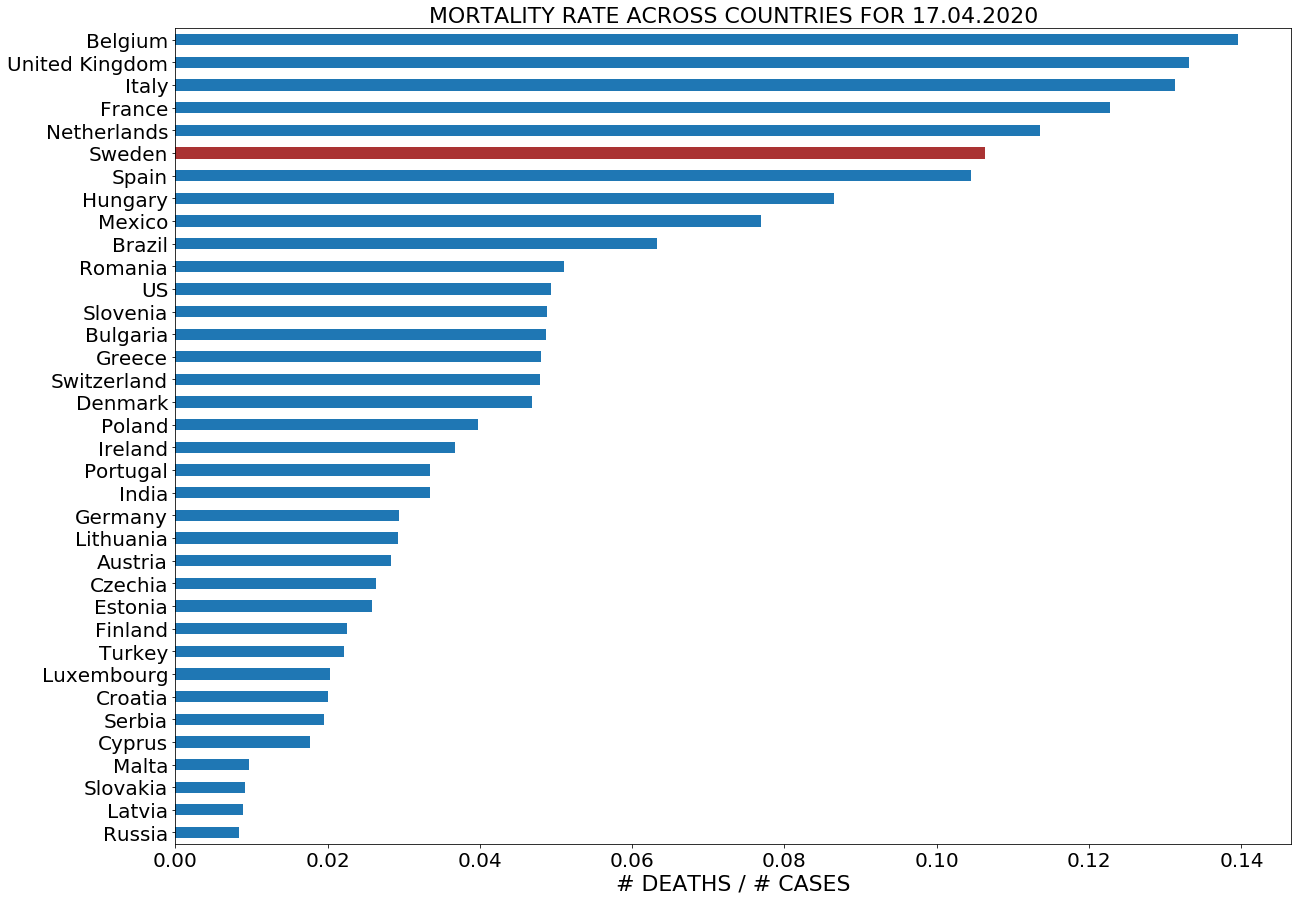

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = mortality_rate_europe.plot.barh(fontsize = 20)
    
highlight = 'Sweden'
pos = mortality_rate_europe.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#aa3333')

plt.title('MORTALITY RATE ACROSS COUNTRIES FOR 17.04.2020', fontsize = 22)
plt.xlabel('# DEATHS / # CASES', fontsize = 22)
plt.show()

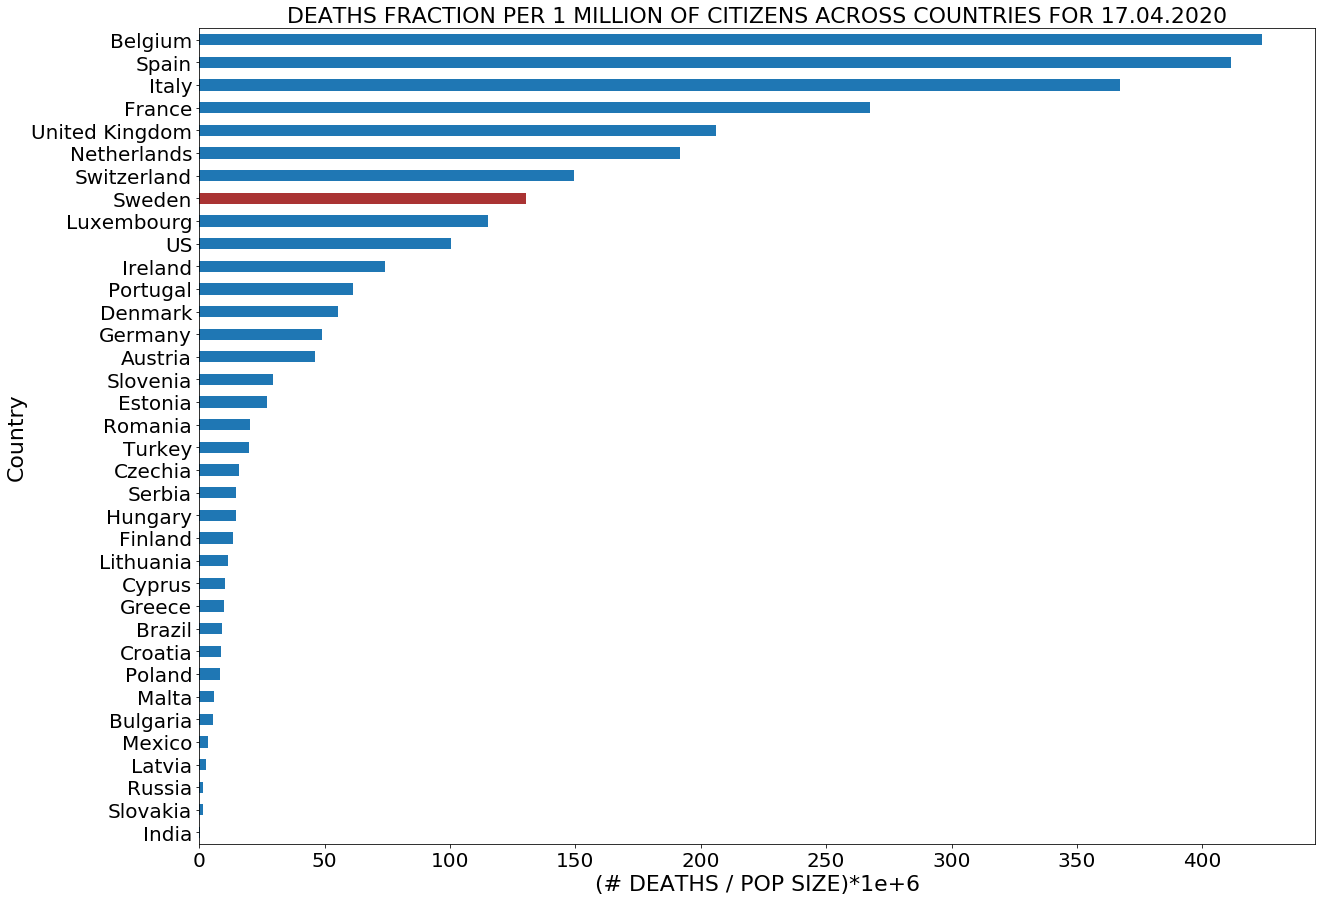

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = death_popsize.plot.barh(fontsize = 20)
    
highlight = 'Sweden'
pos = death_popsize.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#aa3333')

plt.title('DEATHS FRACTION PER 1 MILLION OF CITIZENS ACROSS COUNTRIES FOR 17.04.2020', fontsize = 22)
plt.xlabel('(# DEATHS / POP SIZE)*1e+6', fontsize = 22)
plt.show()

In [40]:
#cases = np.log10(cases + 1)
#deaths = np.log10(deaths + 1)
#deaths2cases = np.log10(deaths2cases + 1)

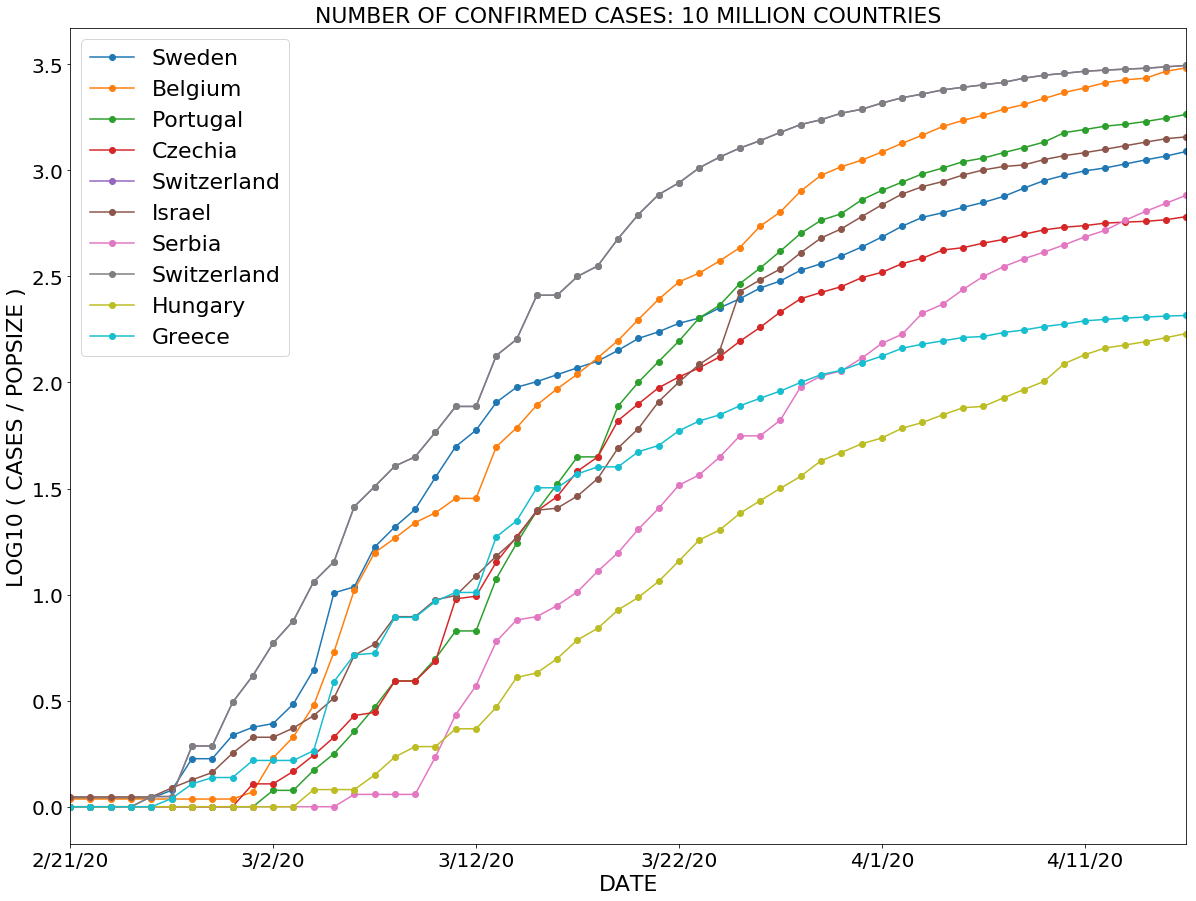

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

#countries_of_interest = ['Sweden', 'Belgium', 'Germany', 'Russia', 'Italy', 'Portugal', 'US']
#countries_of_interest = ['Sweden', 'Belgium', 'Russia', 'Portugal', 'Czechia', 'Israel', 'Hungary', 'Greece']
countries_of_interest = ['Sweden', 'Belgium', 'Portugal', 'Czechia', 'Switzerland', 
                         'Israel', 'Serbia', 'Switzerland', 'Hungary', 'Greece']

for i in countries_of_interest:
    #cases.loc[i].plot(style='o-', fontsize = 20)
    cases.loc[i].apply(lambda x: np.log10((x / pop_size_europe_dict[i])*1e+6 + 1)).plot(style='o-', fontsize = 20)

plt.xlabel('DATE', fontsize = 22)
plt.ylabel('LOG10 ( CASES / POPSIZE )', fontsize = 22)
plt.title('NUMBER OF CONFIRMED CASES: 10 MILLION COUNTRIES', fontsize = 22)
plt.legend(countries_of_interest, loc='upper left', fontsize = 22)
plt.show()

In [47]:
deaths.loc['Sweden'][deaths.loc['Sweden'] > 0]

3/11/20       1
3/12/20       1
3/13/20       1
3/14/20       2
3/15/20       3
3/16/20       6
3/17/20       7
3/18/20      10
3/19/20      11
3/20/20      16
3/21/20      20
3/22/20      21
3/23/20      25
3/24/20      36
3/25/20      62
3/26/20      77
3/27/20     105
3/28/20     105
3/29/20     110
3/30/20     146
3/31/20     180
4/1/20      239
4/2/20      308
4/3/20      358
4/4/20      373
4/5/20      401
4/6/20      477
4/7/20      591
4/8/20      687
4/9/20      793
4/10/20     870
4/11/20     887
4/12/20     899
4/13/20     919
4/14/20    1033
4/15/20    1203
4/16/20    1333
Name: Sweden, dtype: int64

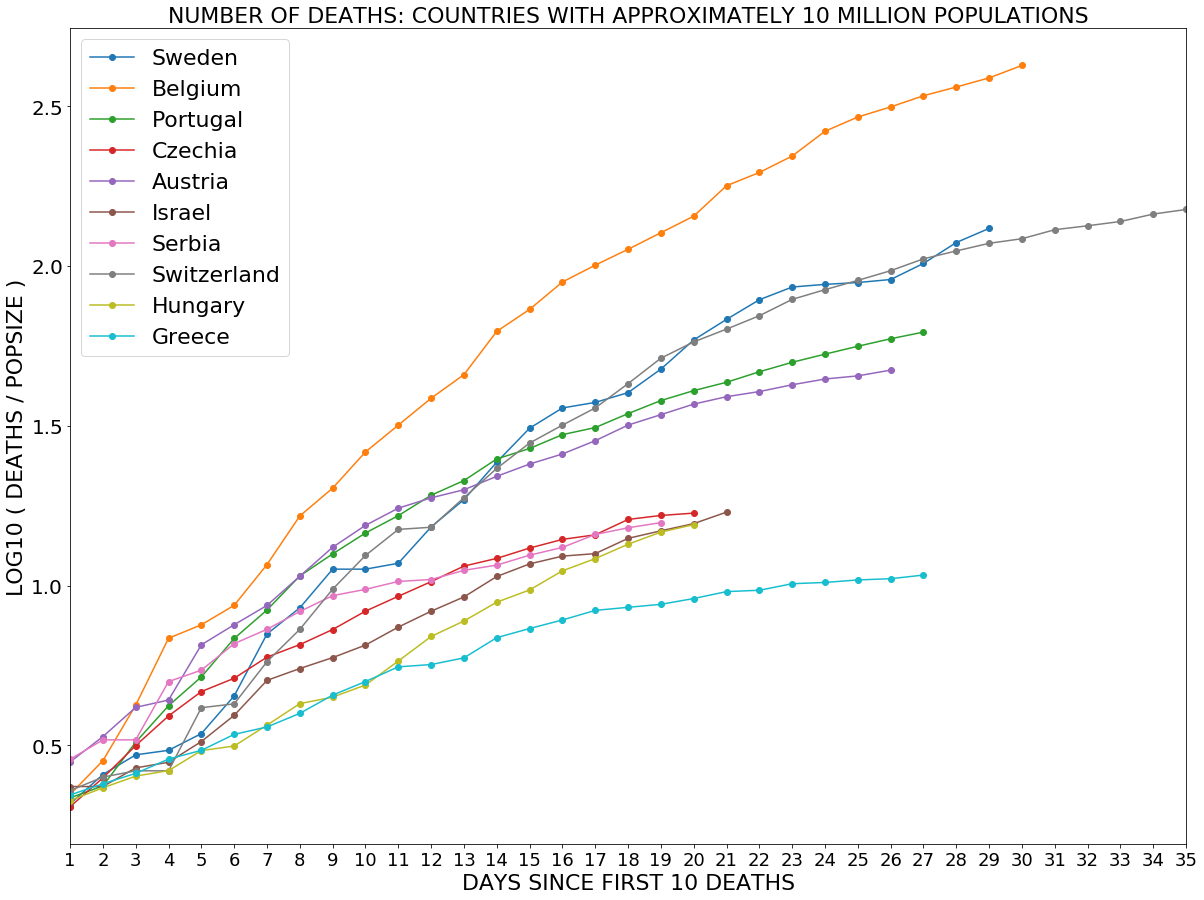

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

countries_of_interest = ['Sweden', 'Belgium', 'Portugal', 'Czechia', 'Austria', 
                         'Israel', 'Serbia', 'Switzerland', 'Hungary', 'Greece']

day_0 = 10
for i in countries_of_interest:
    #deaths.loc[i].plot(style='o-', fontsize = 20)
    deaths.loc[i][deaths.loc[i]>day_0].apply(lambda x:
                                         np.log10((x/pop_size_europe_dict[i])*1e+6+1)).plot(style='o-',
                                                                                            fontsize=20)

plt.xlabel('DAYS SINCE FIRST 10 DEATHS', fontsize = 22)
plt.ylabel('LOG10 ( DEATHS / POPSIZE )', fontsize = 22)
plt.title('NUMBER OF DEATHS: COUNTRIES WITH APPROXIMATELY 10 MILLION POPULATIONS', fontsize = 22)
plt.legend(countries_of_interest, loc='upper left', fontsize = 22)
my_ticks = np.array(list(range(len(list(deaths.loc['Switzerland'][deaths.loc['Switzerland']>day_0])))))
plt.xticks(ticks = my_ticks, labels = my_ticks+1, fontsize = 18)
plt.show()

In [78]:
len(list(deaths.loc['Switzerland'][deaths.loc['Switzerland']>day_0]))

43

In [79]:
len(list(deaths.loc['Sweden'][deaths.loc['Sweden']>day_0]))

37

In [99]:
deaths.loc['Sweden'][-1]

1333

In [98]:
deaths.loc['Switzerland'][-1]

1281

In [76]:
list(deaths.loc['Switzerland'])[-1]*(pop_size_europe_dict['Sweden']/pop_size_europe_dict['Switzerland'])

1529.1283547257876

In [103]:
pop_size_europe_dict['Sweden']/pop_size_europe_dict['Switzerland']

1.1936989498249708

In [104]:
(1529-1333)/6

32.666666666666664

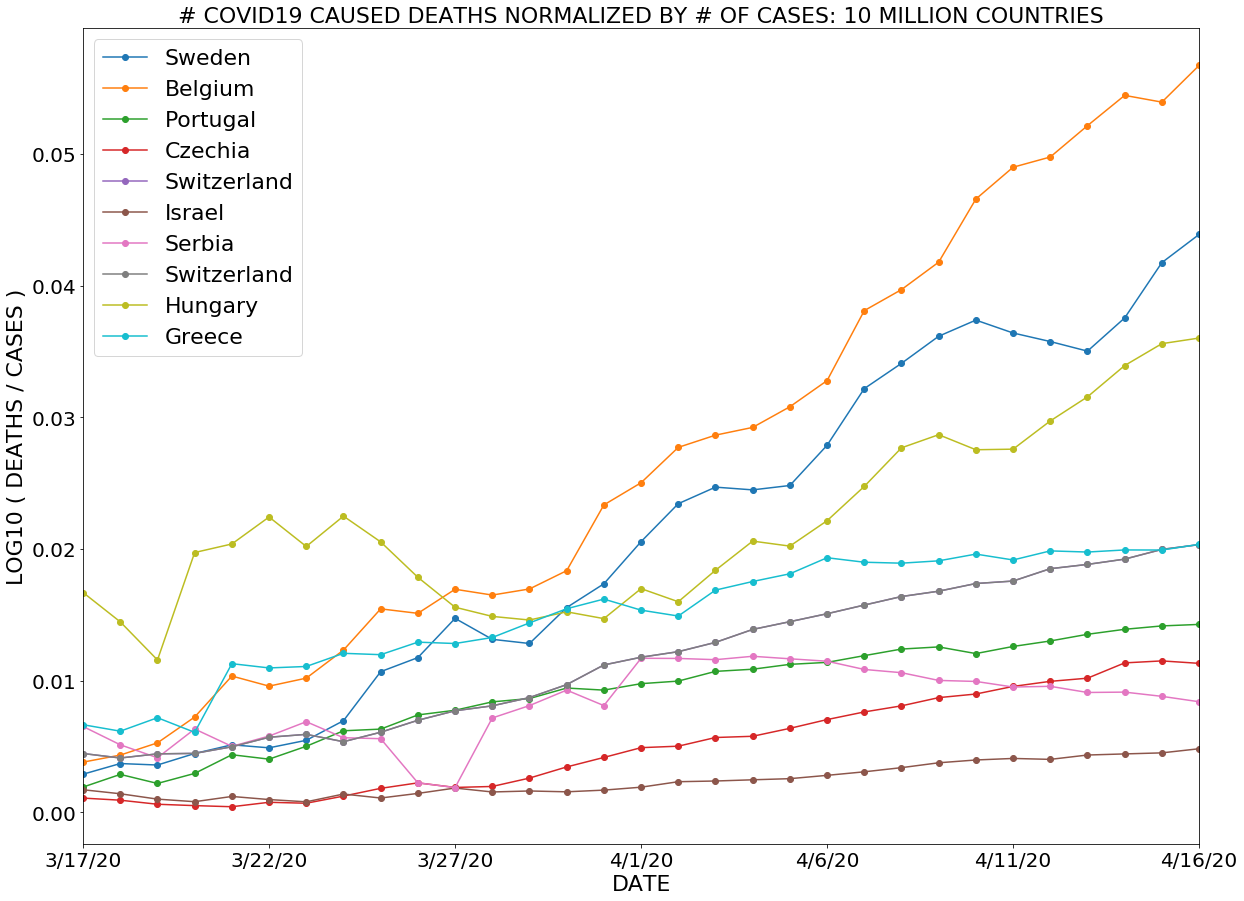

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

countries_of_interest = ['Sweden', 'Belgium', 'Portugal', 'Czechia', 'Switzerland', 
                         'Israel', 'Serbia', 'Switzerland', 'Hungary', 'Greece']

for i in countries_of_interest:
    deaths2cases.loc[i].plot(style='o-', fontsize = 20)

plt.xlabel('DATE', fontsize = 22)
plt.ylabel('LOG10 ( DEATHS / CASES )', fontsize = 22)
plt.title('# COVID19 CAUSED DEATHS NORMALIZED BY # OF CASES: 10 MILLION COUNTRIES', fontsize = 22)
plt.legend(countries_of_interest, loc='upper left', fontsize = 22)
plt.show()

### Making Predictions with Gaussian Process

Here we will use a simple Scikitlearn (not Tensorflow Probability) Gaussian Process in order to make a non-linear fit of the cases and deaths curves from Sweden and Russia.

In [44]:
import numpy as np
sweden_deaths = np.array(list(deaths.loc['Sweden'])).reshape(-1,1)
sweden_deaths = sweden_deaths[sweden_deaths != 0]
days = np.array(list(range(len(sweden_deaths)))).reshape(-1,1)
days.shape

(37, 1)

In [45]:
sweden_deaths

array([0.30103   , 0.30103   , 0.30103   , 0.47712125, 0.60205999,
       0.84509804, 0.90308999, 1.04139269, 1.07918125, 1.23044892,
       1.32221929, 1.34242268, 1.41497335, 1.56820172, 1.79934055,
       1.8920946 , 2.02530587, 2.02530587, 2.04532298, 2.16731733,
       2.25767857, 2.38021124, 2.48995848, 2.55509445, 2.5728716 ,
       2.60422605, 2.6794279 , 2.77232171, 2.83758844, 2.8998205 ,
       2.94001816, 2.94841297, 2.95424251, 2.96378783, 3.01452054,
       3.08062649, 3.12515583])

In [46]:
days

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36]])

In [47]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, ConstantKernel, RBF, ExpSineSquared, DotProduct

#kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
kernel = DotProduct() * RBF()
gp = gaussian_process.GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = 9, alpha = 0.007)
gp.fit(days, sweden_deaths)

GaussianProcessRegressor(alpha=0.007, copy_X_train=True,
                         kernel=DotProduct(sigma_0=1) * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [48]:
days_pred = np.linspace(0, 100, num = 100).reshape(-1,1)
deaths_pred, sigma = gp.predict(days_pred, return_std=True)

In [49]:
deaths_pred

array([ 0.12293298,  0.25934417,  0.39279182,  0.52327214,  0.65078141,
        0.77531593,  0.89687206,  1.01544621,  1.13103482,  1.24363436,
        1.35324139,  1.45985246,  1.56346421,  1.6640733 ,  1.76167643,
        1.85627036,  1.94785189,  2.03641786,  2.12196516,  2.20449072,
        2.28399151,  2.36046457,  2.43390695,  2.50431577,  2.57168818,
        2.63602139,  2.69731265,  2.75555924,  2.81075851,  2.86290784,
        2.91200465,  2.95804643,  3.00103069,  3.04095499,  3.07781696,
        3.11161424,  3.14234454,  3.17000561,  3.19459524,  3.21611127,
        3.23455159,  3.24991414,  3.26219688,  3.27139785,  3.27751512,
        3.2805468 ,  3.28049106,  3.27734611,  3.2711102 ,  3.26178165,
        3.24935878,  3.23384002,  3.21522378,  3.19350857,  3.16869293,
        3.14077542,  3.10975469,  3.0756294 ,  3.03839829,  2.99806011,
        2.95461369,  2.90805789,  2.85839162,  2.80561384,  2.74972355,
        2.6907198 ,  2.62860169,  2.56336836,  2.49501901,  2.42

In [50]:
10**np.max(deaths_pred)

1907.861314585213

In [51]:
10**(deaths_pred - sigma)[np.argmax(deaths_pred)]

1527.1452718488033

In [52]:
10**(deaths_pred + sigma)[np.argmax(deaths_pred)]

2383.4895492844726

In [53]:
np.argmax(deaths_pred)

45

Since we have data for 36 points but the peak of pandemia in Sweden will be on the 45th day, it means it will be in 45 - 37 = 8 days from now (17th of April 2020), i.e. on the 25th of April 2020 and after that the number of deaths in Sweden will be constant.

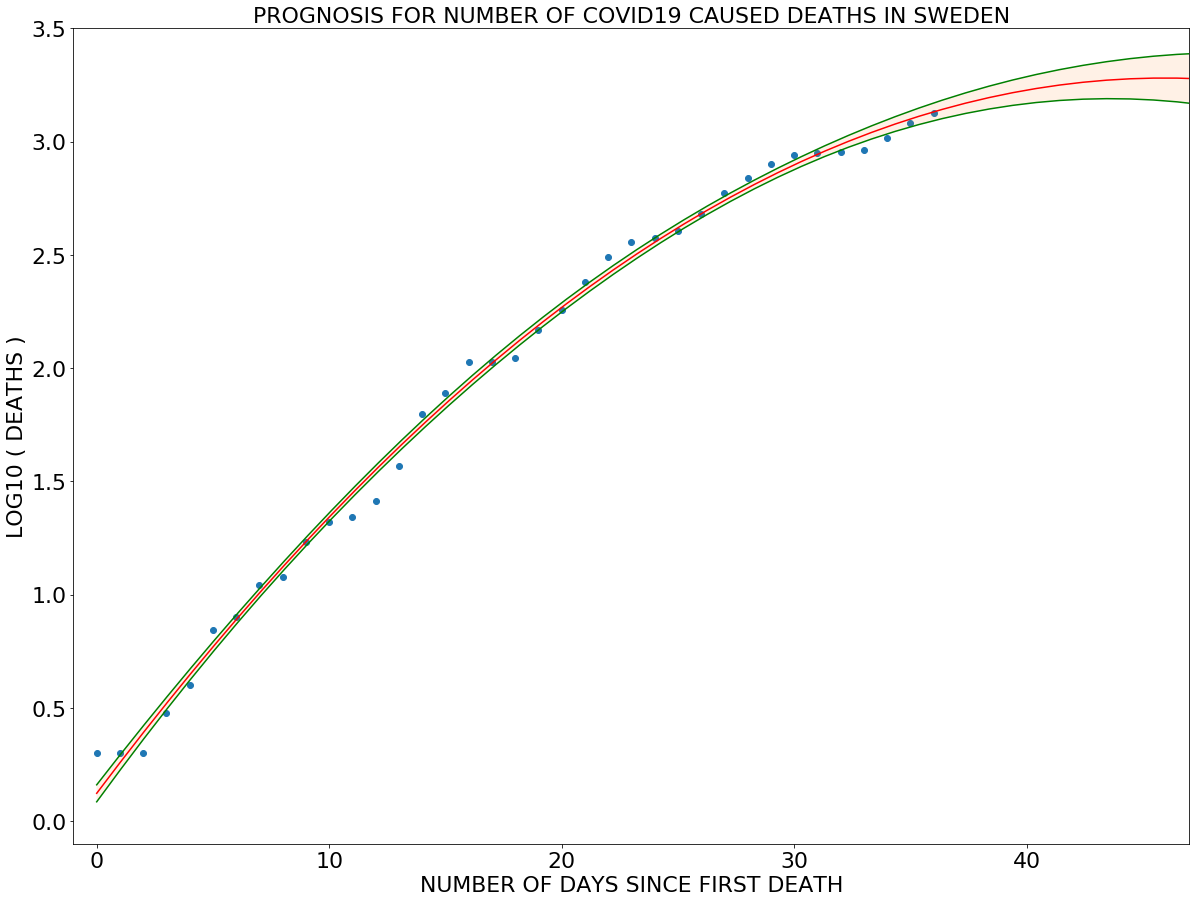

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))

plt.scatter(days, sweden_deaths)
plt.plot(days_pred, deaths_pred, c='r')
plt.plot(days_pred, deaths_pred + sigma, c='g')
plt.plot(days_pred, deaths_pred - sigma, c='g')
plt.fill_between(days_pred.flatten(), deaths_pred + sigma, deaths_pred - sigma, alpha=0.1)
plt.xlim([-1,47]); plt.ylim([-0.1,3.5])
plt.xlabel('NUMBER OF DAYS SINCE FIRST DEATH', fontsize = 22)
plt.ylabel('LOG10 ( DEATHS )', fontsize = 22)
plt.title('PROGNOSIS FOR NUMBER OF COVID19 CAUSED DEATHS IN SWEDEN', fontsize = 22)
plt.show()

CURRENT PROGNOSIS FOR 17.04.2020: Thus, the estimate is 1907 deaths expected, however in case the situation is out of control the maximum estimate is 2383 deaths, and **the minimum estimate is 1527 deaths in Sweden**, the pandemia will reach **plateau on the 25th of April 2020**.

CURRENT PROGNOSIS FOR 15.04.2020: Thus, the estimate is 2008 deaths expected, however in case the situation is out of control the maximum estimate is 2703 deaths, and **the minimum estimate is 1492 deaths in Sweden**, the pandemia will reach **plateau on the 26th of April 2020**.

CURRENT PROGNOSIS FOR 14.04.2020: Thus, the estimate is 2286 deaths expected, however in case the situation is out of control the maximum estimate is 3255 deaths, and **the minimum estimate is 1606 deaths in Sweden**, the pandemia will reach **plateau on the 27th of April 2020**.

HERE IS THE OLD PROGNOSIS FOR 6.04.2020: Thus, the estimate is 6219 deaths expected, however in case the situation is out of control the maximum estimate is 16 767 deaths, and **the minimum estimate is 2307 deaths in Sweden**, the pandemia will reach **plateau on the 5th of May 2020**.

### Epidemiological Simulations of Number of Deaths in Sweden with SEIRD Model

Here we will use the SEIRD epidemiological model to estimate the number of deths in Sweden. The math behind SEIRD model is summalized in this great post https://towardsdatascience.com/simulating-compartmental-models-in-epidemiology-using-python-jupyter-widgets-8d76bdaff5c2

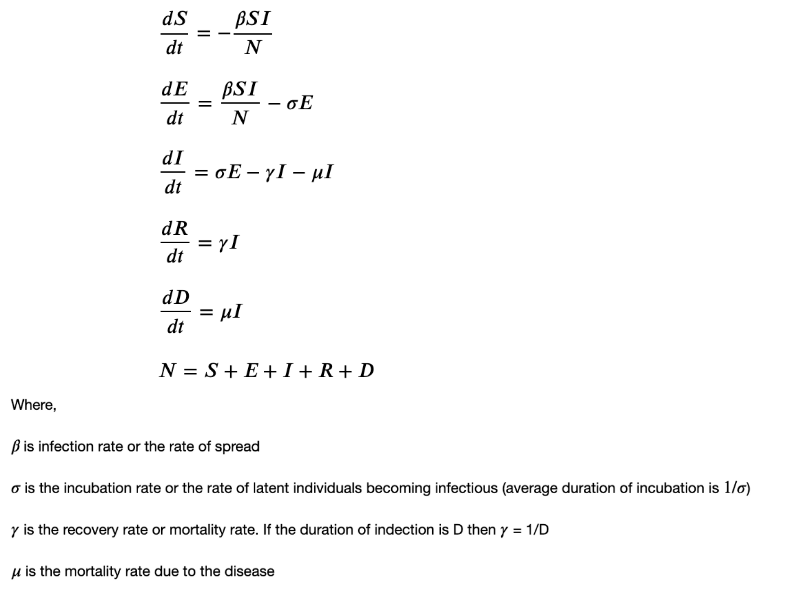

In [6]:
from IPython.display import Image
Image('/home/nikolay/Documents/Medium/COVID19/SEIRD_math.png', width=1000)

In [1]:
import os
import numpy as np
import pandas as pd

os.chdir('/home/nikolay/Documents/Medium/COVID19/')

deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
deaths = deaths[deaths['Province/State'].isna()==True]
deaths.index = list(deaths['Country/Region'])
deaths = deaths.drop(['Province/State', 'Lat', 'Long', 'Country/Region'], axis = 1)
deaths = deaths.drop(list(deaths.columns[0:25]), axis = 1)
deaths.head()

,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,14,14,15,15,18,18,21,23,25,30
Albania,0,0,0,0,0,0,0,0,0,0,...,22,22,23,23,23,23,23,24,25,26
Algeria,0,0,0,0,0,0,0,0,0,0,...,193,205,235,256,275,293,313,326,336,348
Andorra,0,0,0,0,0,0,0,0,0,0,...,22,23,25,26,26,29,29,31,33,33
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

matplotlib.rcParams.update({'font.size': 22})

def ode_model(z, t, beta, sigma, gamma, mu):
    S, E, I, R, D = z
    N = S + E + I + R + D
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

def ode_solver(t, initial_conditions, params):
    initE, initI, initR, initN, initD = initial_conditions
    beta, sigma, gamma, mu = params
    initS = initN - (initE + initI + initR + initD)
    res = odeint(ode_model, [initS, initE, initI, initR, initD], t, args=(beta, sigma, gamma, mu))
    return res

In [3]:
days_data = np.array(range(len(list(deaths.loc['Sweden'])))).reshape(-1,1)
days = len(days_data)

In [4]:
def my_predict(parameters):
    initE = parameters[0]
    initI = parameters[1]
    initR = parameters[2]
    initN = parameters[3]
    initD = parameters[4]
    beta = parameters[5]
    sigma = parameters[6]
    gamma = parameters[7]
    mu = parameters[8]
    
    initial_conditions = [initE, initI, initR, initN, initD]
    params = [beta, sigma, gamma, mu]
    tspan = np.arange(0, days, 1)
    sol = ode_solver(tspan, initial_conditions, params)
    S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]
    return np.sqrt(np.sum((np.log10(D+1)-np.log10(np.array(list(deaths.loc['Sweden']))+1))**2)) / len(days_data)

In [5]:
my_predict([1, 1, 0, 10e+6, 0, 1, 1/5, 1/3, 0.008])

0.02846805590680437

In [6]:
from scipy import optimize
bnds = ((1, 100), (1, 100), (0, 0), (10e+6, 10e+6), (0, 0), (0, 10), (0, 10), (0, 10), (0, 10))
#bnds = ((1, 100), (1, 100), (0, 0), (10e+6, 10e+6), (0, 0), (0, 10), (0, 1), (0, 1), (0, 10))
parameters_est = optimize.minimize(my_predict, [1, 0, 0, 10e+6, 0, 1, 1/5, 1/3, 0.008], 
                                   bounds = bnds, method = 'SLSQP')
parameters_est

     fun: 0.02225427546876638
     jac: array([-6.24044333e-05, -8.73056706e-05,  2.56113708e-08, -2.44472176e-08,
        8.35946365e-03,  4.17234842e-04,  9.46856802e-04, -1.43708149e-03,
        2.68910767e-02])
 message: 'Optimization terminated successfully.'
    nfev: 179
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([1.00011484e+00, 1.00017387e+00, 0.00000000e+00, 1.00000000e+07,
       0.00000000e+00, 1.04211091e+00, 1.98402279e-01, 2.90401734e-01,
       3.49697409e-03])

In [7]:
parameters_est.x

array([1.00011484e+00, 1.00017387e+00, 0.00000000e+00, 1.00000000e+07,
       0.00000000e+00, 1.04211091e+00, 1.98402279e-01, 2.90401734e-01,
       3.49697409e-03])

In [8]:
initE, initI, initR, initN, initD, beta, sigma, gamma, mu = parameters_est.x
print('initE = {0},\ninitI = {1},\ninitR = {2},\ninitN = {3},\ninitD = {4},\nbeta = {5},\nsigma = {6},\ngamma = {7},\nmu = {8}'.format(initE, initI, initR, initN, initD, beta, sigma, gamma, mu))

initE = 1.0001148449435628,
initI = 1.000173866773244,
initR = 0.0,
initN = 10000000.0,
initD = 0.0,
beta = 1.042110913441063,
sigma = 0.19840227871272817,
gamma = 0.2904017342342499,
mu = 0.00349697409019739


In [9]:
my_predict(parameters_est.x)

0.02225427546876638

In [10]:
R0 = beta / gamma
R0

3.5885147731261613

In [11]:
#Manual tuning
#initN = 10e+6
#initE = 1; initI = 1; initR = 0; initD = 0
#sigma = 1/5
#gamma = 1/3
#mu = 0.008
#R0 = 3.5
#beta = R0 * gamma

days_data = np.array(range(len(list(deaths.loc['Sweden'])))).reshape(-1,1)
#days = len(days_data)
days = 120

initial_conditions = [initE, initI, initR, initN, initD]
params = [beta, sigma, gamma, mu]
tspan = np.arange(0, days, 1)
sol = ode_solver(tspan, initial_conditions, params)
S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]

In [12]:
beta

1.042110913441063

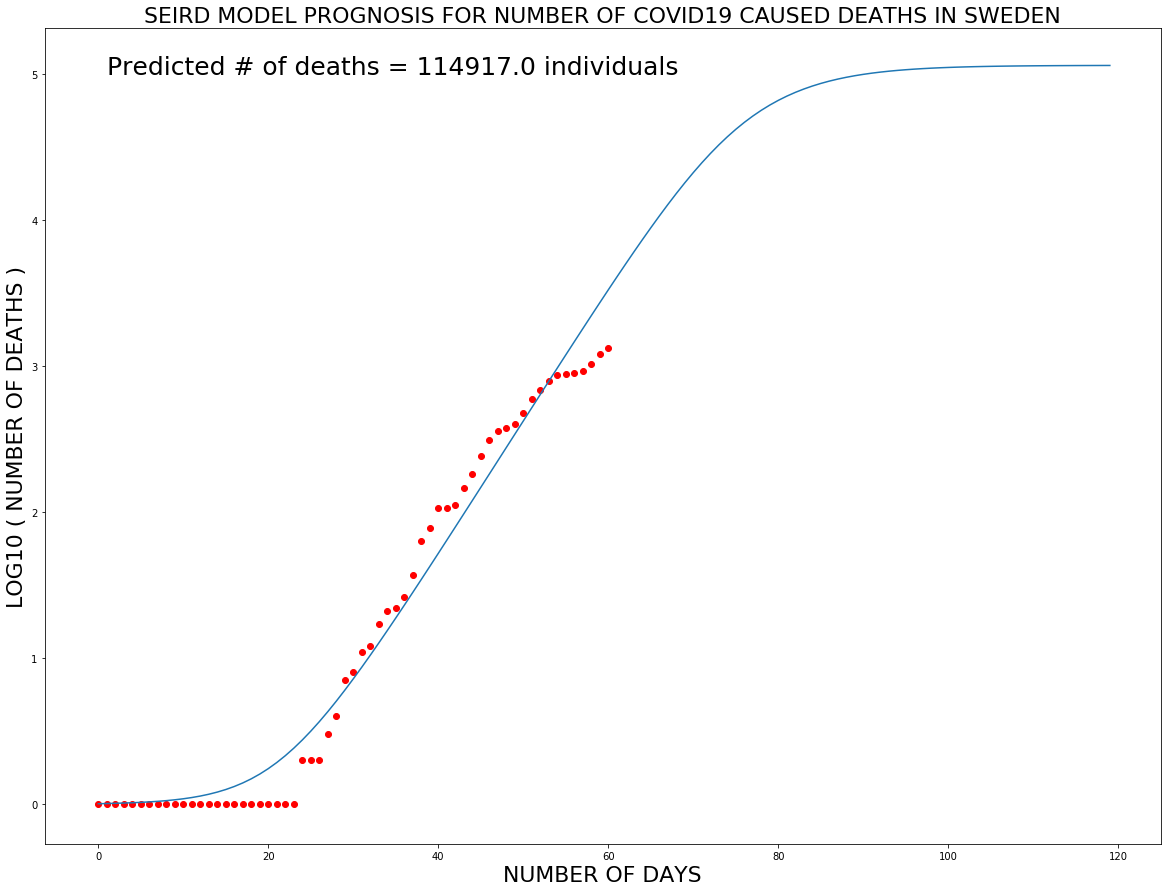

In [13]:
plt.figure(figsize=(20, 15))
plt.plot(tspan, np.log10(D + 1))
plt.scatter(days_data, np.log10(np.array(list(deaths.loc['Sweden'])) + 1), color = 'red')
#plt.plot(tspan, D)
#plt.scatter(days_data, np.array(list(deaths.loc['Sweden'])), color = 'red')
plt.xlabel('NUMBER OF DAYS', fontsize = 22)
plt.ylabel('LOG10 ( NUMBER OF DEATHS )', fontsize = 22)
plt.title('SEIRD MODEL PROGNOSIS FOR NUMBER OF COVID19 CAUSED DEATHS IN SWEDEN', fontsize = 22)
plt.text(1, 5, s='Predicted # of deaths = {} individuals'.format(np.round(D[-1],0)), fontsize = 25)
plt.show()

In [14]:
np.round(D[-1],0)

114917.0

### Making Predictions About Mortality in Sweden with Edward
Here I will use a Bayesian neural networks in order to predict the number of deaths in Sweden in the future.

### Making Predictions with Tensor Flow Probability

Here we will make Bayesian predictions for numbersof confirmed cases and deaths in Sweden and Russia with credible intervals.

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
print(tf.__version__)
print(tfp.__version__)

2.1.0-rc1
0.9.0
